In [10]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [11]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [12]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [13]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [14]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
#         print(list_file_content)
        list_file_content = list(filter(None, list_file_content))
#         print(list_file_content)
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [15]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [16]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [17]:
file_path = 'vae_inv_n_norm/cosine_Inv/'

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida Não Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida quanto maior for o valor maior é a similaridade entre os itens.

Obs: O maior valor encontrado na matriz de similaridade corresponde a similaridade do vetor com ele mesmo.

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.


### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "VAE" o comportamento quanto a variação do @k para as métricas utilizadas é o mesmo observado no AutoEncoder "CAE", há uma crescente no desempenho para metrica Recall, NDCG mantém valores similares somente tendo uma crescente para @k igual a 100 e a métrica MAP mostrando uma decrescimento de desempenho do algoritmo conforme o valor de @k cresce.

No geral os resultados obtidos pelo algoritmo quando utilizado as matrizes de representação geradas pelo AutoEncoder VAE foi pior do que os resultados encontrados por "CAE e Sparse".

Aqui também chama bastante atenção o fato de que as representações de matrizes com menor percentual (10%, 20% e 30%) tiveram resultados muito ruins comparadas com os resultados das outras representações. O algoritmo convergiu rapidamente durante o treinamento para as matrizes de pequenas representações o que demostrou que ele foi muito bem no treino, entretanto, nos testes seu desempenho deixou muito a desejar.


Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

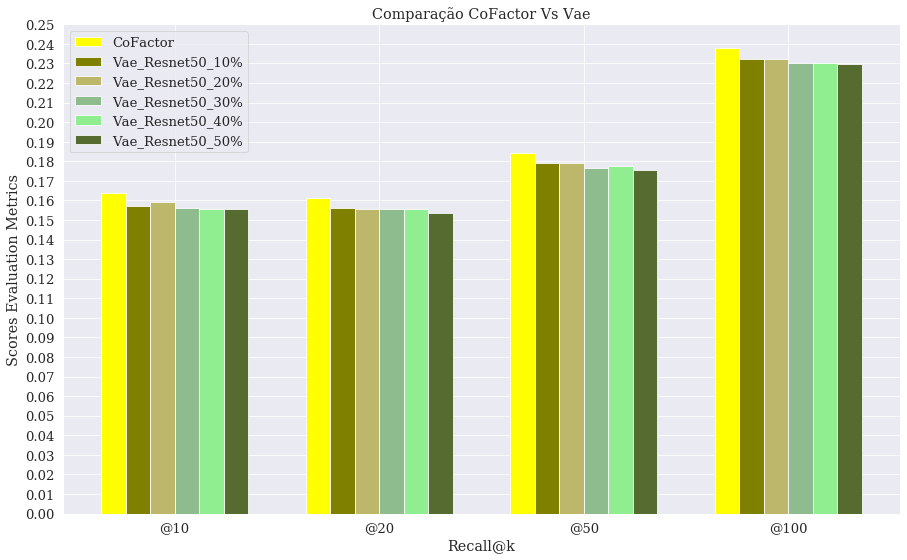

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1572  0.1561  0.1792  0.2321
20%       0.1590  0.1558  0.1789  0.2324
30%       0.1562  0.1554  0.1765  0.2300
40%       0.1558  0.1554  0.1775  0.2302
50%       0.1558  0.1538  0.1755  0.2296





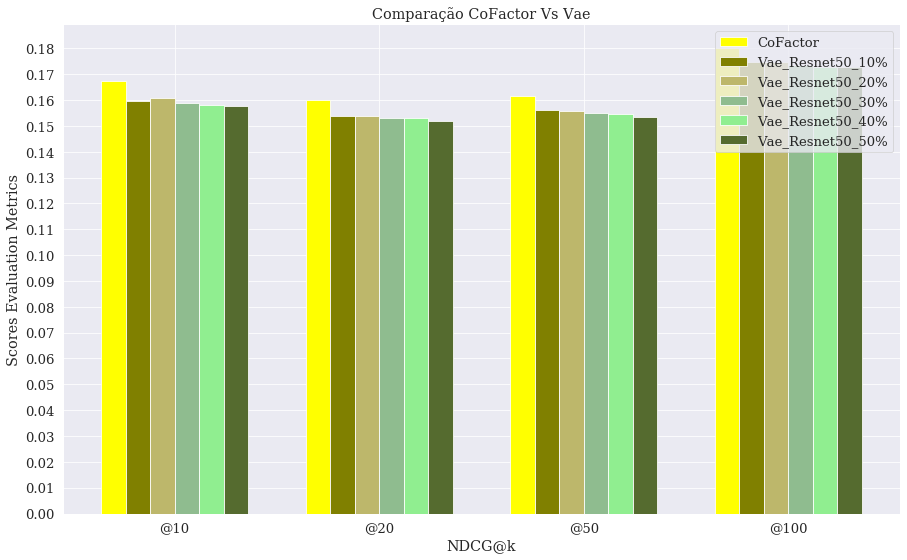

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1598  0.1539  0.1560  0.1746
20%       0.1609  0.1539  0.1557  0.1747
30%       0.1589  0.1530  0.1548  0.1735
40%       0.1581  0.1529  0.1545  0.1729
50%       0.1576  0.1518  0.1536  0.1727





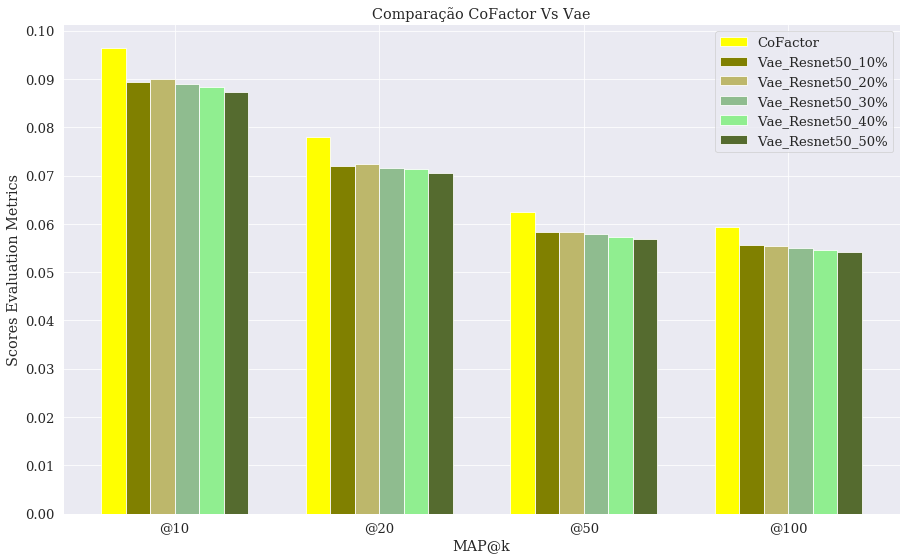

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0894  0.0720  0.0583  0.0556
20%       0.0900  0.0724  0.0582  0.0555
30%       0.0889  0.0715  0.0578  0.0550
40%       0.0884  0.0714  0.0573  0.0545
50%       0.0873  0.0705  0.0568  0.0541


In [18]:
list_file_name = ['vae_resnet50_10_pct_rec_val'
                  , 'vae_resnet50_20_pct_rec_val'
                  , 'vae_resnet50_30_pct_rec_val'
                  , 'vae_resnet50_40_pct_rec_val'
                  , 'vae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

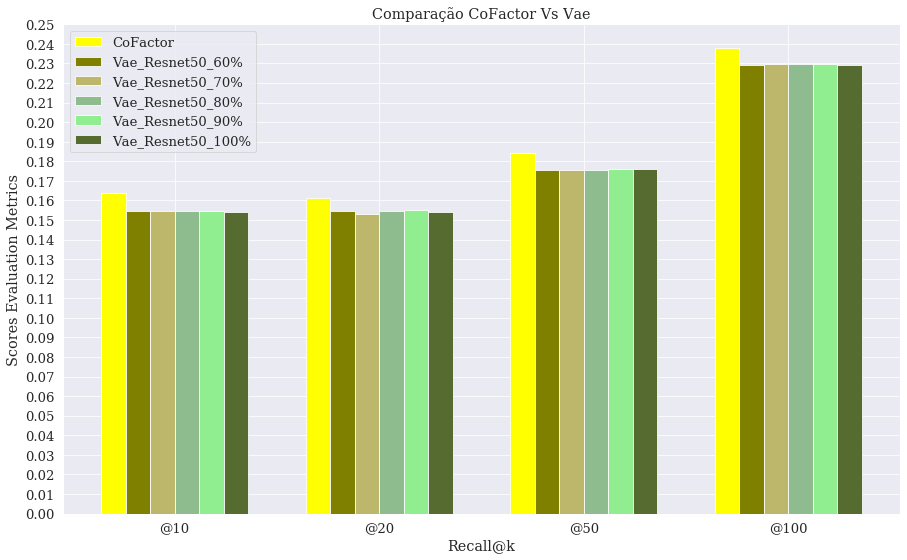

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1548  0.1544  0.1757  0.2293
70%       0.1546  0.1533  0.1753  0.2295
80%       0.1544  0.1546  0.1755  0.2297
90%       0.1547  0.1551  0.1760  0.2297
100%      0.1539  0.1540  0.1758  0.2291





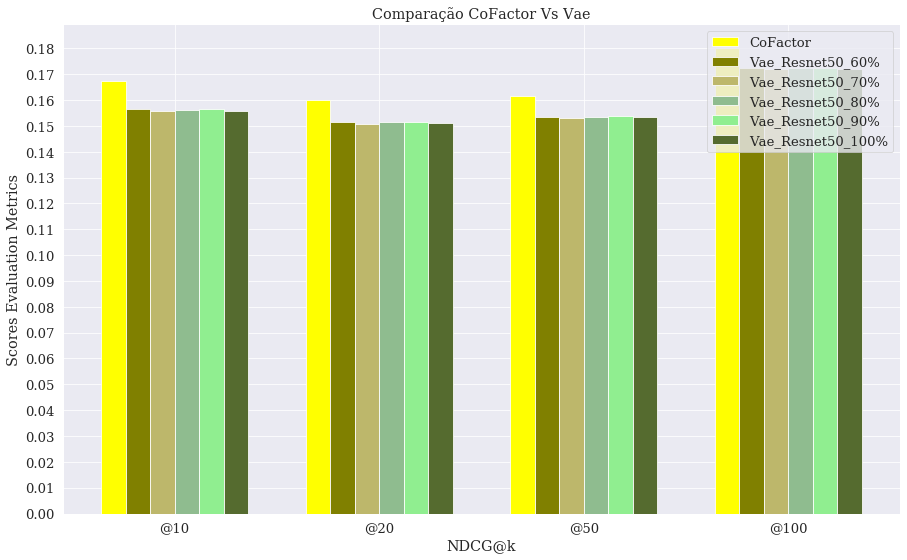

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1567  0.1515  0.1535  0.1724
70%       0.1559  0.1507  0.1530  0.1719
80%       0.1562  0.1515  0.1535  0.1723
90%       0.1565  0.1516  0.1537  0.1724
100%      0.1558  0.1510  0.1533  0.1719





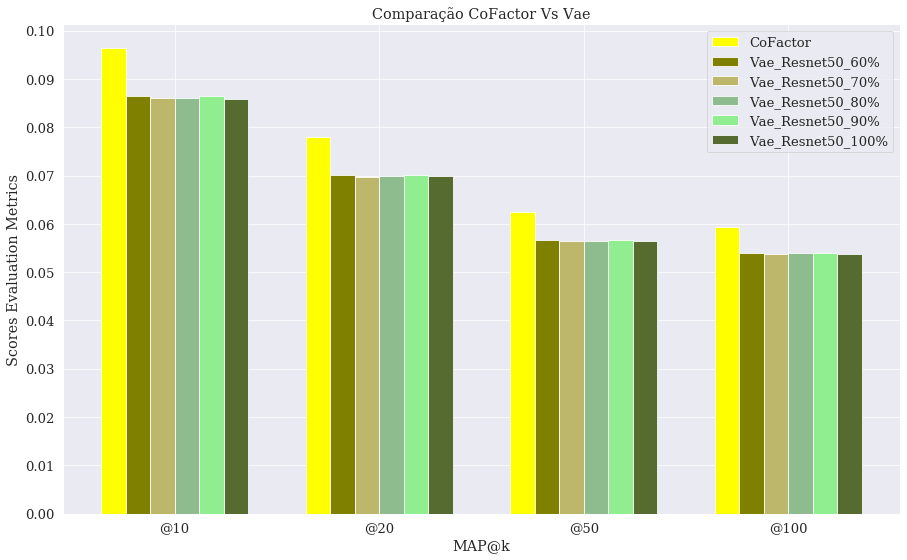

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0864  0.0701  0.0566  0.0540
70%       0.0861  0.0697  0.0564  0.0538
80%       0.0860  0.0699  0.0564  0.0539
90%       0.0864  0.0701  0.0567  0.0540
100%      0.0858  0.0698  0.0564  0.0537


In [19]:
list_file_name = ['vae_resnet50_60_pct_rec_val'
                  , 'vae_resnet50_70_pct_rec_val'
                  , 'vae_resnet50_80_pct_rec_val'
                  , 'vae_resnet50_90_pct_rec_val'
                  , 'vae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

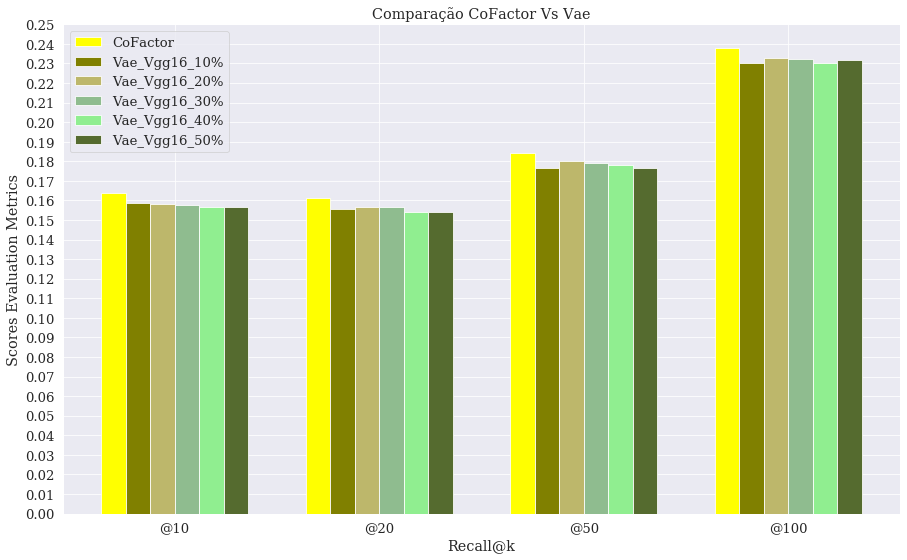

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1586  0.1557  0.1768  0.2302
20%       0.1584  0.1565  0.1802  0.2329
30%       0.1577  0.1566  0.1790  0.2325
40%       0.1566  0.1542  0.1779  0.2304
50%       0.1566  0.1543  0.1767  0.2316





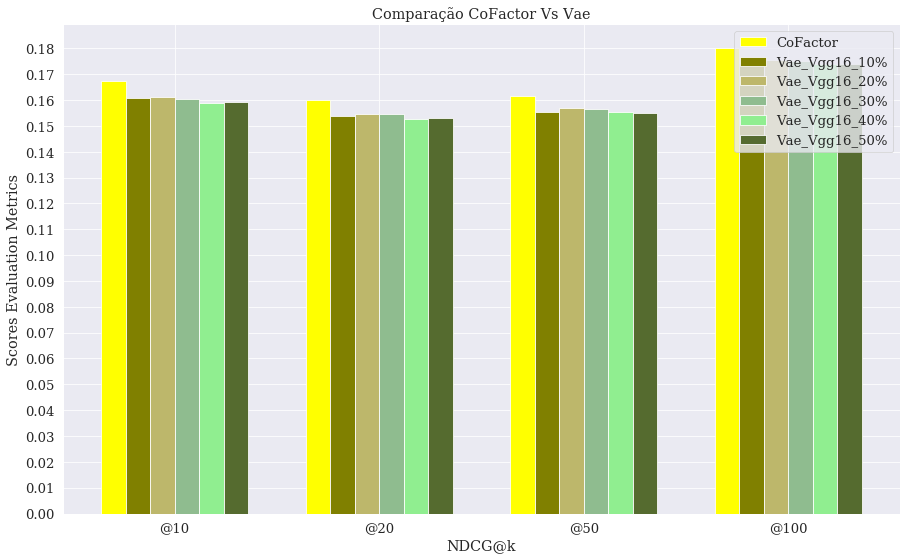

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1608  0.1539  0.1555  0.1743
20%       0.1612  0.1547  0.1571  0.1755
30%       0.1603  0.1545  0.1564  0.1750
40%       0.1590  0.1526  0.1554  0.1740
50%       0.1594  0.1529  0.1550  0.1740





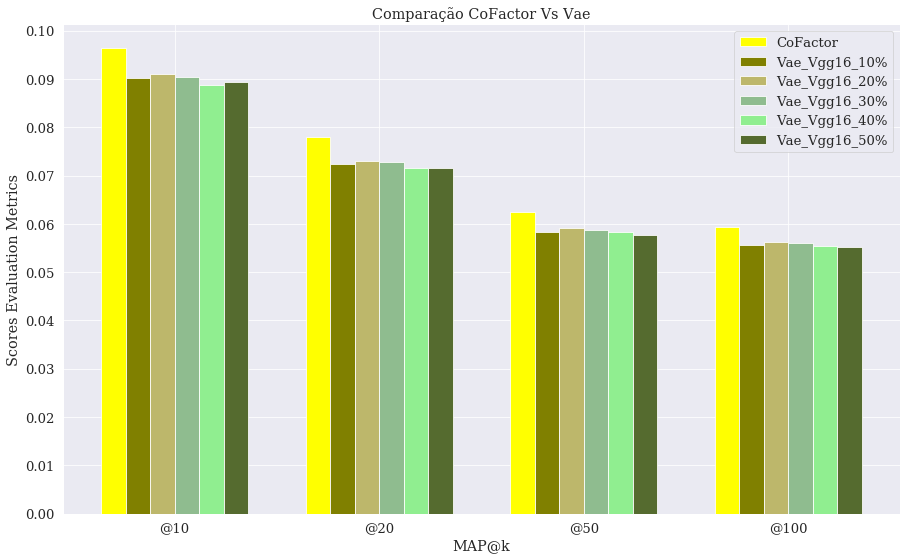

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0902  0.0723  0.0583  0.0556
20%       0.0910  0.0730  0.0592  0.0562
30%       0.0903  0.0728  0.0588  0.0560
40%       0.0888  0.0716  0.0582  0.0555
50%       0.0894  0.0716  0.0577  0.0551


In [20]:
list_file_name = ['vae_vgg16_10_pct_rec_val'
                  , 'vae_vgg16_20_pct_rec_val'
                  , 'vae_vgg16_30_pct_rec_val'
                  , 'vae_vgg16_40_pct_rec_val'
                  , 'vae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

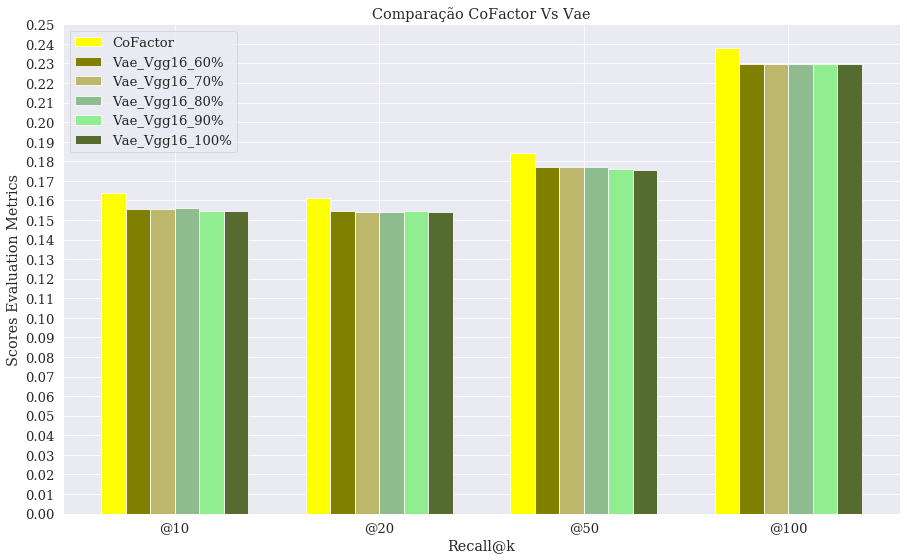

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1556  0.1544  0.1772  0.2297
70%       0.1554  0.1542  0.1770  0.2296
80%       0.1563  0.1543  0.1770  0.2298
90%       0.1544  0.1546  0.1758  0.2297
100%      0.1546  0.1540  0.1756  0.2297





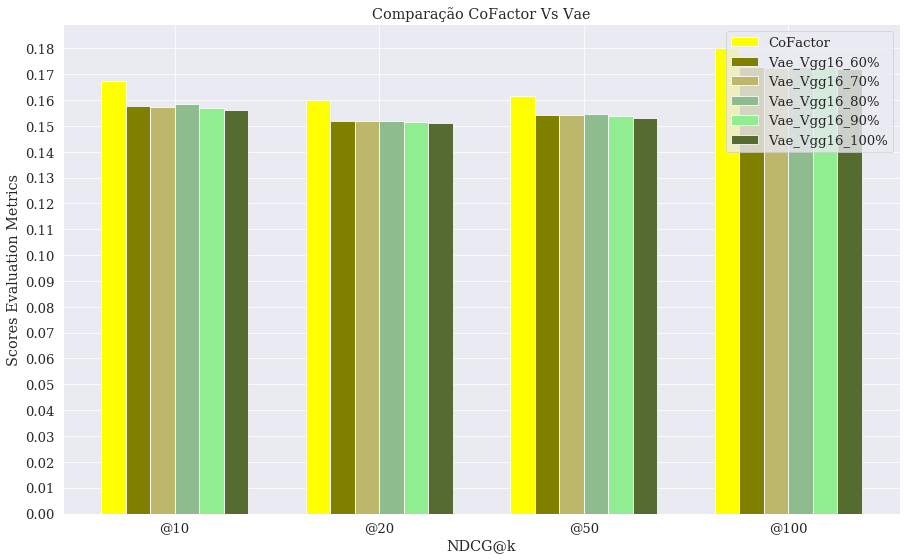

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1577  0.1518  0.1543  0.1728
70%       0.1574  0.1518  0.1541  0.1724
80%       0.1583  0.1520  0.1545  0.1727
90%       0.1571  0.1516  0.1537  0.1726
100%      0.1562  0.1510  0.1531  0.1721





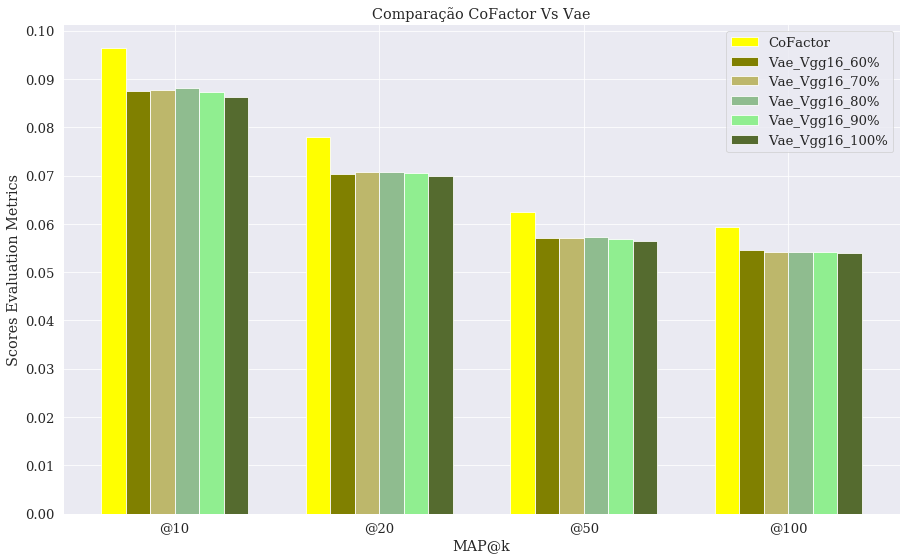

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0875  0.0704  0.0571  0.0545
70%       0.0877  0.0707  0.0571  0.0542
80%       0.0881  0.0708  0.0572  0.0542
90%       0.0873  0.0705  0.0569  0.0542
100%      0.0863  0.0699  0.0564  0.0539


In [21]:
list_file_name = ['vae_vgg16_60_pct_rec_val'
                  , 'vae_vgg16_70_pct_rec_val'
                  , 'vae_vgg16_80_pct_rec_val'
                  , 'vae_vgg16_90_pct_rec_val'
                  ,'vae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

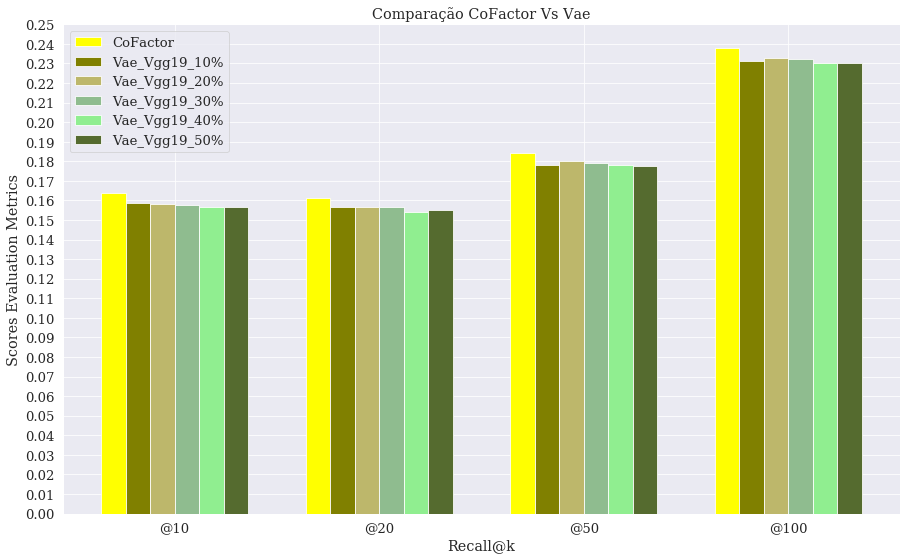

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1588  0.1566  0.1779  0.2310
20%       0.1584  0.1565  0.1802  0.2329
30%       0.1577  0.1566  0.1790  0.2325
40%       0.1566  0.1542  0.1779  0.2304
50%       0.1567  0.1550  0.1774  0.2302





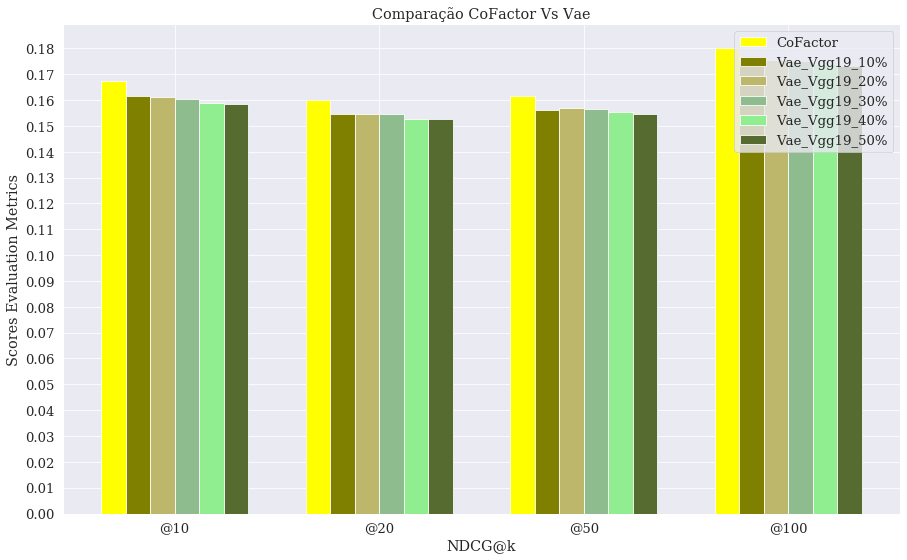

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1616  0.1547  0.1562  0.1745
20%       0.1612  0.1547  0.1571  0.1755
30%       0.1603  0.1545  0.1564  0.1750
40%       0.1590  0.1526  0.1554  0.1740
50%       0.1585  0.1525  0.1546  0.1731





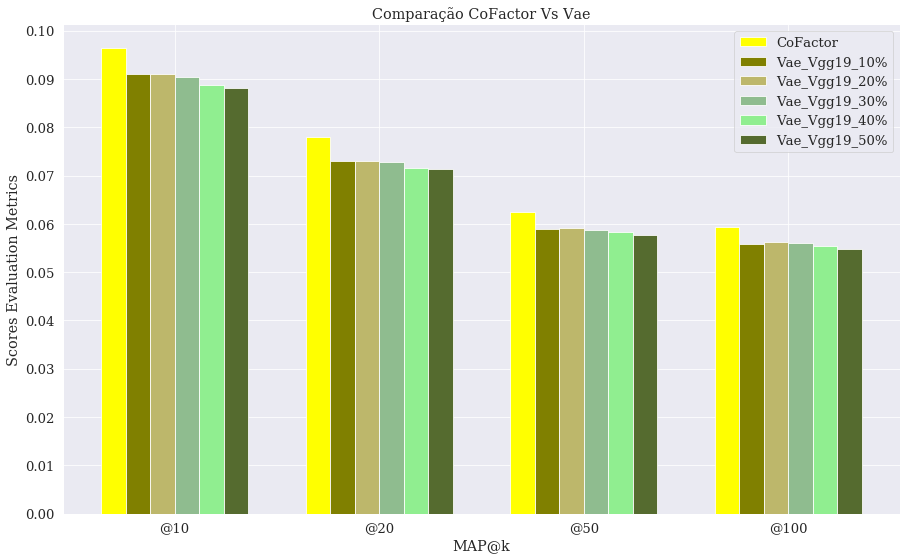

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0911  0.0731  0.0589  0.0559
20%       0.0910  0.0730  0.0592  0.0562
30%       0.0903  0.0728  0.0588  0.0560
40%       0.0888  0.0716  0.0582  0.0555
50%       0.0882  0.0714  0.0576  0.0547


In [22]:
list_file_name = ['vae_vgg19_10_pct_rec_val'
                  , 'vae_vgg19_20_pct_rec_val'
                  , 'vae_vgg19_30_pct_rec_val'
                  , 'vae_vgg19_40_pct_rec_val'
                  , 'vae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

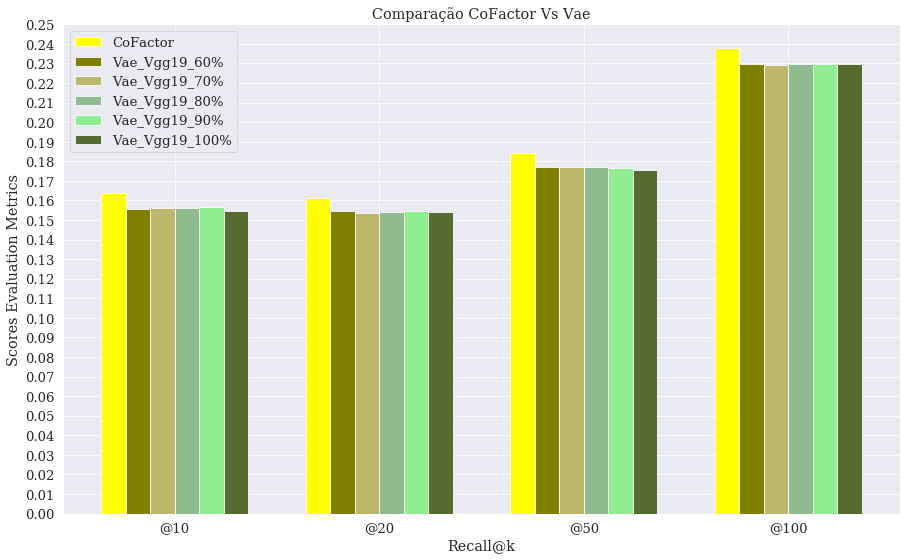

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1556  0.1544  0.1772  0.2297
70%       0.1559  0.1537  0.1773  0.2294
80%       0.1563  0.1543  0.1770  0.2298
90%       0.1568  0.1546  0.1763  0.2296
100%      0.1546  0.1540  0.1756  0.2297





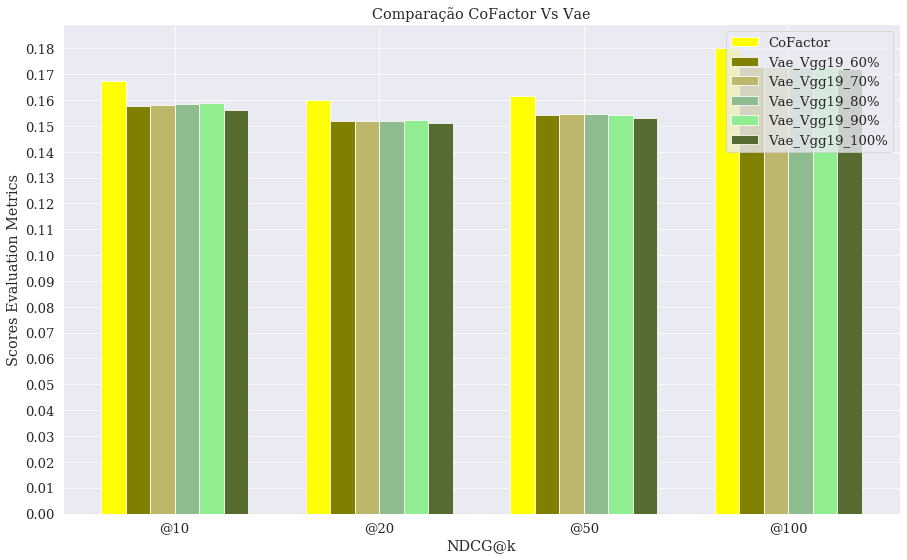

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1577  0.1518  0.1543  0.1728
70%       0.1582  0.1519  0.1547  0.1729
80%       0.1583  0.1520  0.1545  0.1727
90%       0.1588  0.1524  0.1542  0.1729
100%      0.1562  0.1510  0.1531  0.1721





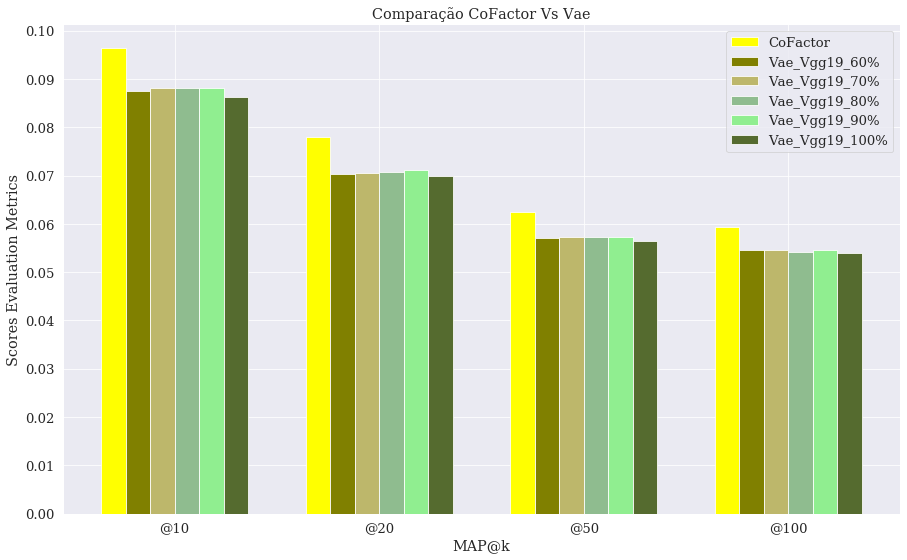

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0875  0.0704  0.0571  0.0545
70%       0.0881  0.0706  0.0573  0.0545
80%       0.0881  0.0708  0.0572  0.0542
90%       0.0882  0.0711  0.0572  0.0545
100%      0.0863  0.0699  0.0564  0.0539


In [23]:
list_file_name = ['vae_vgg19_60_pct_rec_val'
                  , 'vae_vgg19_70_pct_rec_val'
                  , 'vae_vgg19_80_pct_rec_val'
                  , 'vae_vgg19_90_pct_rec_val'
                  , 'vae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

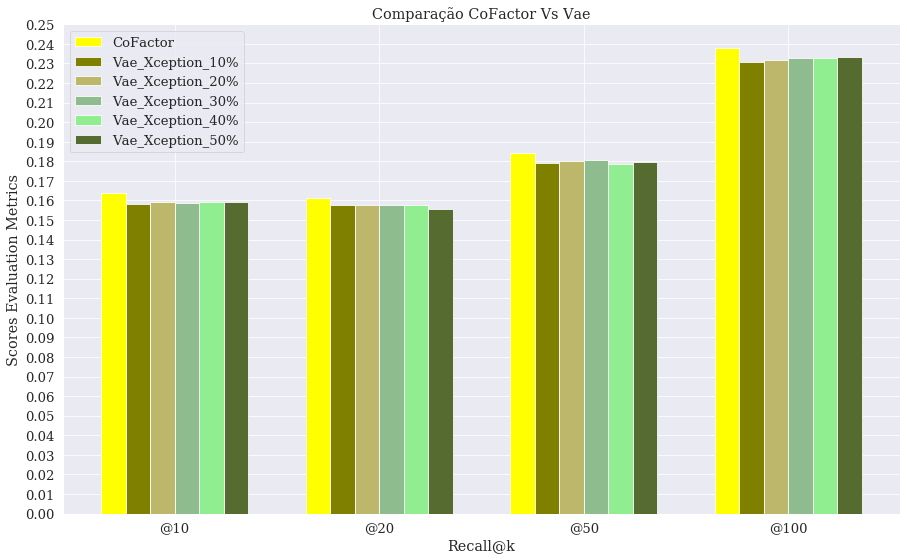

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1583  0.1575  0.1790  0.2309
20%       0.1593  0.1578  0.1800  0.2318
30%       0.1588  0.1574  0.1807  0.2329
40%       0.1591  0.1574  0.1784  0.2327
50%       0.1593  0.1557  0.1798  0.2334





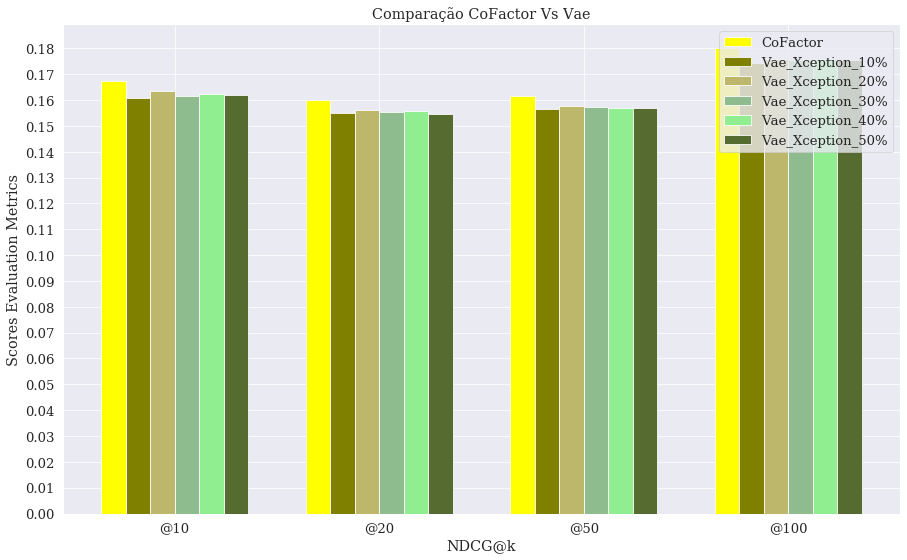

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1608  0.1548  0.1566  0.1745
20%       0.1635  0.1563  0.1578  0.1758
30%       0.1615  0.1555  0.1573  0.1756
40%       0.1625  0.1557  0.1571  0.1758
50%       0.1621  0.1546  0.1571  0.1755





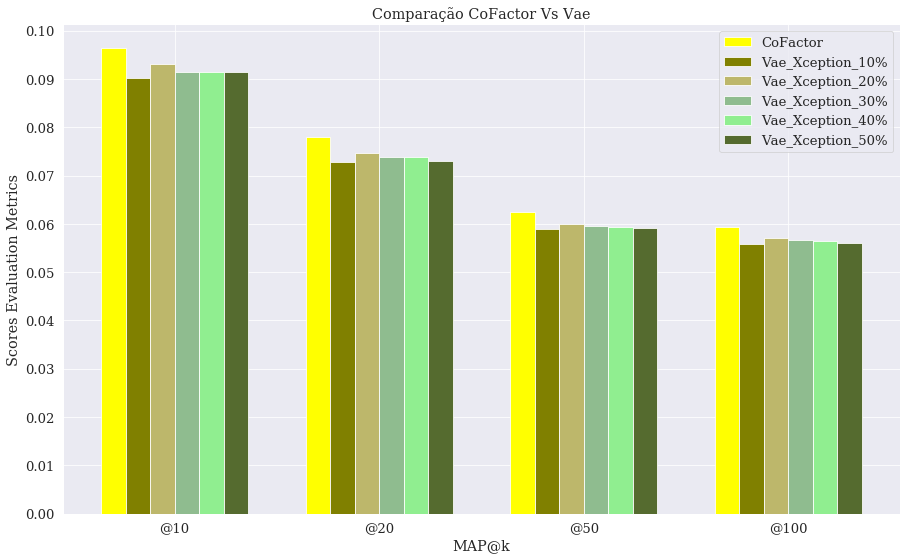

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0902  0.0728  0.0589  0.0559
20%       0.0930  0.0746  0.0600  0.0570
30%       0.0914  0.0739  0.0595  0.0566
40%       0.0914  0.0738  0.0593  0.0565
50%       0.0914  0.0731  0.0591  0.0560


In [24]:
list_file_name = ['vae_xception_10_pct_rec_val'
                  , 'vae_xception_20_pct_rec_val'
                  , 'vae_xception_30_pct_rec_val'
                  , 'vae_xception_40_pct_rec_val'
                  , 'vae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

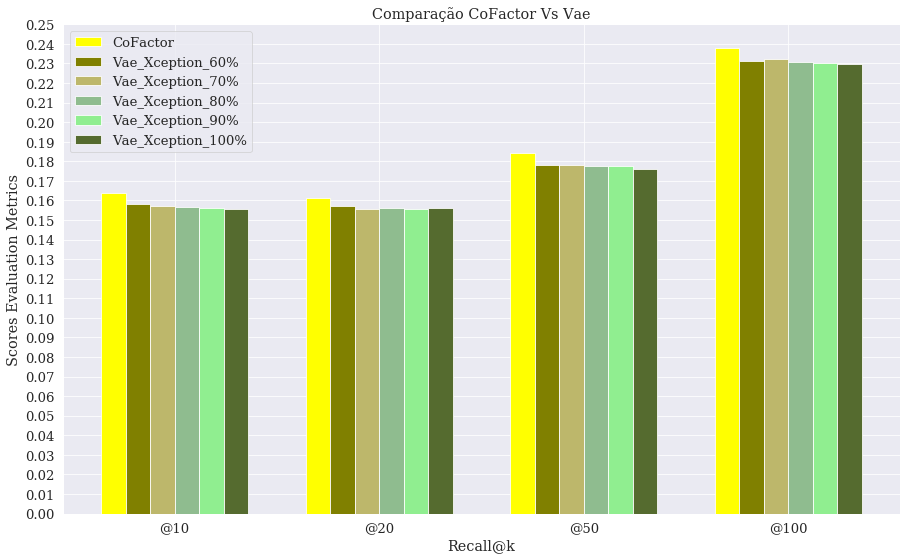

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1580  0.1570  0.1780  0.2310
70%       0.1572  0.1556  0.1783  0.2320
80%       0.1567  0.1559  0.1778  0.2308
90%       0.1561  0.1556  0.1777  0.2300
100%      0.1557  0.1559  0.1758  0.2295





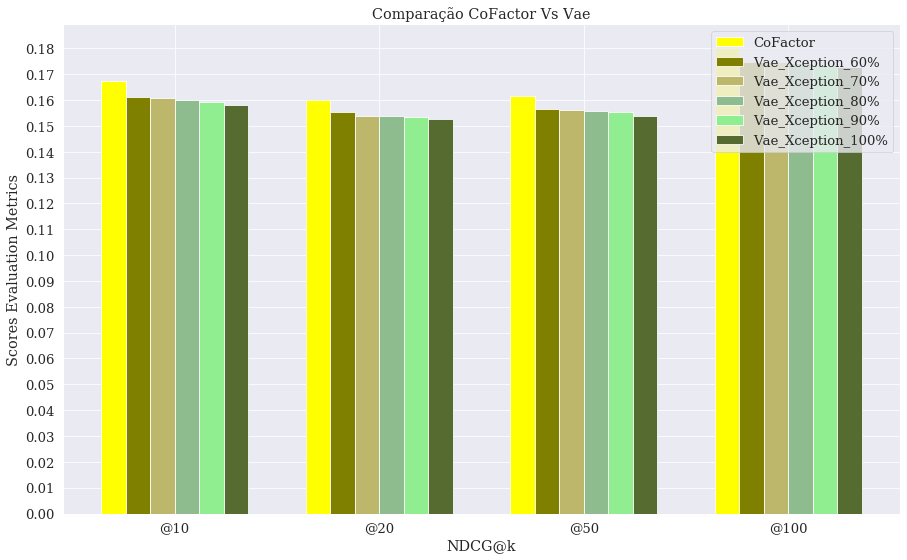

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1611  0.1553  0.1565  0.1747
70%       0.1607  0.1540  0.1562  0.1749
80%       0.1601  0.1539  0.1559  0.1745
90%       0.1592  0.1535  0.1554  0.1735
100%      0.1580  0.1527  0.1537  0.1726





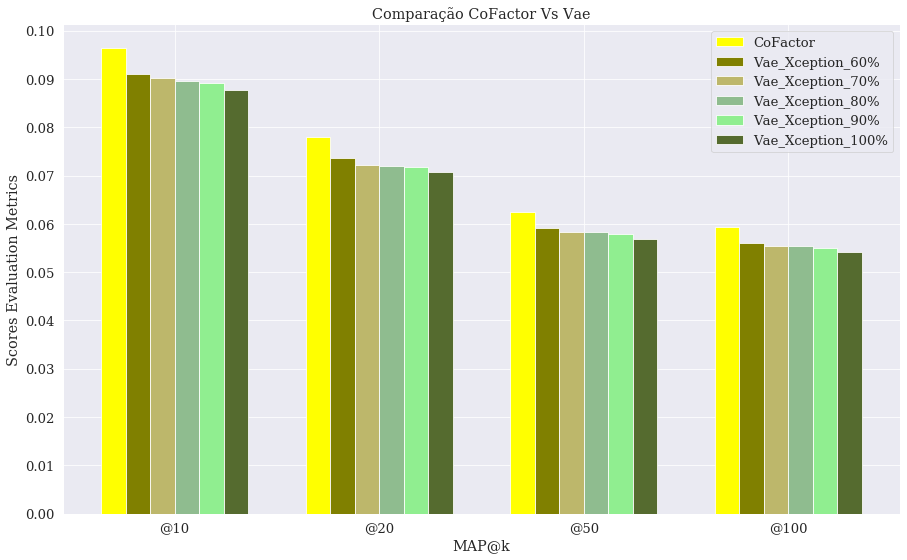

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0910  0.0737  0.0592  0.0560
70%       0.0902  0.0721  0.0583  0.0555
80%       0.0895  0.0719  0.0583  0.0555
90%       0.0891  0.0718  0.0579  0.0549
100%      0.0877  0.0708  0.0568  0.0542


In [25]:
list_file_name = ['vae_xception_60_pct_rec_val'
                  , 'vae_xception_70_pct_rec_val'
                  , 'vae_xception_80_pct_rec_val'
                  , 'vae_xception_90_pct_rec_val'
                  , 'vae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
